In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## The Data

### Heart Disease: Prediction And Classification

Data Source and Feature Codebook: https://www.cdc.gov/brfss/annual_data/annual_2019.html

The Behavioral Risk Factor Surviellance System (BRFSS) is a project conducted by the Centre for Disease Control and Prevention (CDC) in all states in the United States. This dataset is done via survey over the phone, and collects data on health risk behaviours, chronic diseaes and conditions, access to healthcare and much more. The raw dataset was cleaned and only 18 attributes that would be relevant to heart disease prediction and classification were selected, such as specific demographics, health indicators, risk factors, and general health and wellness. The target variable in this analysis is 'HeartDisease' and is a yes or no attribute declaring if the individual has ever had coronary heart disease (CHD) or a myocardial infarction (MI) before. 

According to the CDC, important risk factors for heart disease are high blood pressure, high cholesterol, diabetes, smoking, obesity, unhealthy diet, and physical inactivity. From the 343 variables in the dataset, the health indicators in this dataset were chosen from this information. The cleaned dataset can be found on the github page. 

Source: https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity.

### Attribute Information:

1. HeartDisease: Reported having coronary heart disease (CHD) or myocardial infarction (MI) --- 1=yes, 0=no [TARGET VARIABLE]
2. Age: Thirteen-level age category --- 1=18-24, 2=25-29, 3=30-34, 4=35-39, 5=40-44, 6=45-49, 7=50-54, 8=55-59, 9=60-64, 10=65-69, 11=70-74, 12=75-79, 13=80+
3. Sex: Sex of Respondent --- 1=male, 0=female
4. Education: Highest grade or year of school completed --- 1=no school, 2=elementary, 3=some highschool, 4=highschool grad, 5=some college, 6=college grad
5. Income: Annual Household Income --- 1=<10k, 2=10-15k, 3=15-20k, 4=20-25k, 5=25-35k, 6=35-50k, 7=50-75k, 8=75k+
5. HighChol: Cholesterol checked and told by doctor, nurse, or other health professional that it was high --- 1=yes, 0=no
6. HighBP: Told high blood pressure by a doctor, nurse, or other health professional --- 1=yes, 0=no
7. BMI: Body Mass Index (BMI) --- BMI rounded to nearest integer
8. HeavyAlcoholConsump: Heavy drinkers (drinks per week 14+ for men, 7+ for women) --- 1=yes, 0=no
9. Smoker: Current smokers --- 1=yes, 0=no
10. Stroke: Ever had a stroke --- 1=yes, 0=no
11. Diabetes: Have diabetes --- 0=no, 1=prediabetes/borderline, 2=yes
12. PhysicalActivtiy: Physical activity or exercise during the past 30 days other than their regular job --- 1=yes, 0=no
13. Vegetables: Vegetables one or more times a day --- 1=yes, 0=no
14. Fruits: Fruits one or more times a day --- 1=yes, 0=no
15. GenHealth: General health status --- 1=excellent, 2=very good, 3=good, 4=fair, 5=poor
16. MenHealth: Days per month mental health was not good --- how many days per month
17. PhyHealth: Days per month physical health was not good --- how many days per month

### Goal

General goal is to not only create a machine learning algorithm that is effective at predicting and classifying heart disease, but to compare the effectiveness of these various machine learning algorithms with each other. Additionally, a general guideline for researchers and surveyors to see which features and survey questions are more likely to be important in the prediction of heart disease compared to others (e.g., what features to look out for in patients).

In [2]:
brfss = pd.read_csv('heart_disease_brfss2019.csv')

In [3]:
brfss.head()

,HeartDisease,Age,Sex,Education,Income,HighChol,HighBP,BMI,HeavyAlcoholConsump,Smoker,Stroke,Diabetes,PhysicalActivity,Vegetables,Fruits,GenHealth,MenHealth,PhysHealth
0,0.0,13,0,3.0,3.0,1.0,1,28.0,0,0,0.0,0.0,0,1,1,3.0,0.0,15.0
1,0.0,11,0,5.0,5.0,0.0,0,19.0,0,0,0.0,0.0,1,1,1,4.0,0.0,10.0
2,0.0,10,0,6.0,7.0,0.0,1,32.0,0,0,0.0,2.0,1,1,1,3.0,30.0,0.0
3,0.0,11,1,6.0,7.0,0.0,0,33.0,0,1,0.0,2.0,1,1,1,2.0,0.0,30.0
4,0.0,11,0,2.0,3.0,1.0,0,17.0,0,0,0.0,2.0,0,0,0,5.0,0.0,20.0


In [4]:
brfss.shape

(256203, 18)

In [5]:
brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256203 entries, 0 to 256202
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HeartDisease         256203 non-null  float64
 1   Age                  256203 non-null  int64  
 2   Sex                  256203 non-null  int64  
 3   Education            256203 non-null  float64
 4   Income               256203 non-null  float64
 5   HighChol             256203 non-null  float64
 6   HighBP               256203 non-null  int64  
 7   BMI                  256203 non-null  float64
 8   HeavyAlcoholConsump  256203 non-null  int64  
 9   Smoker               256203 non-null  int64  
 10  Stroke               256203 non-null  float64
 11  Diabetes             256203 non-null  float64
 12  PhysicalActivity     256203 non-null  int64  
 13  Vegetables           256203 non-null  int64  
 14  Fruits               256203 non-null  int64  
 15  GenHealth        

In [6]:
brfss.isnull().sum()

HeartDisease           0
Age                    0
Sex                    0
Education              0
Income                 0
HighChol               0
HighBP                 0
BMI                    0
HeavyAlcoholConsump    0
Smoker                 0
Stroke                 0
Diabetes               0
PhysicalActivity       0
Vegetables             0
Fruits                 0
GenHealth              0
MenHealth              0
PhysHealth             0
dtype: int64

In [7]:
brfss.duplicated().sum()

29156

In [8]:
brfss.drop_duplicates(inplace=True)
brfss.duplicated().sum()

0

### Exploratory Data Analysis 

HeartDisease
0.0    204278
1.0     22769
Name: count, dtype: int64

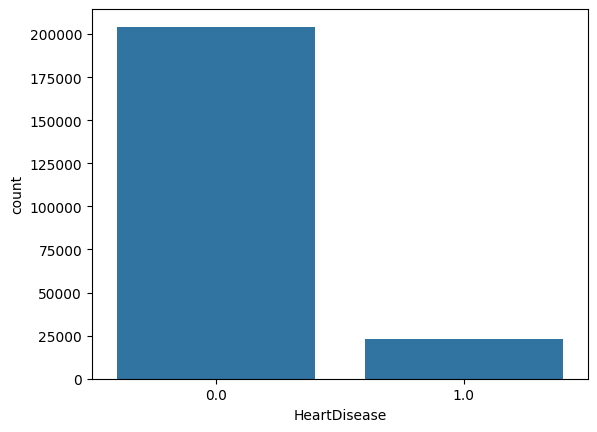

In [9]:
#proportion of people with heart disease 
sns.countplot(data=brfss, x='HeartDisease');
brfss['HeartDisease'].value_counts()

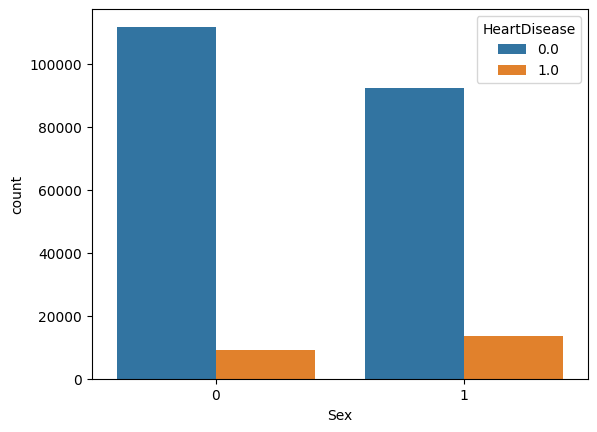

In [10]:
#difference between sex in terms of heart disease
sns.countplot(data=brfss, x='Sex', hue='HeartDisease');

<Axes: xlabel='Age', ylabel='count'>

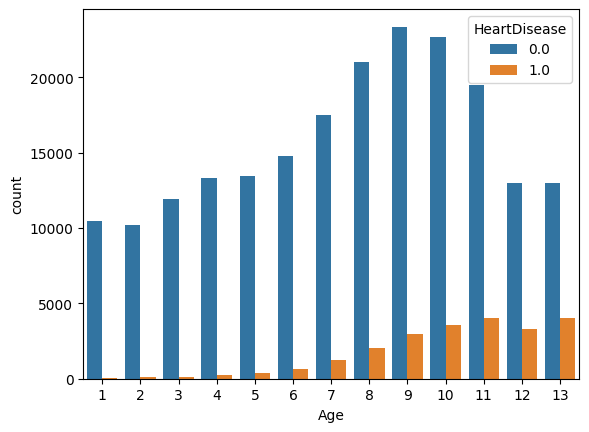

In [11]:
#does age affect chance of getting heart disease
sns.countplot(data=brfss, x='Age', hue='HeartDisease');

<Axes: xlabel='HighChol', ylabel='count'>

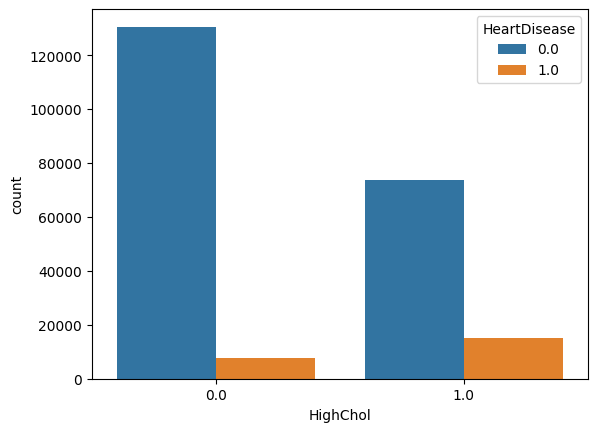

In [12]:
#how does high chol affect risk of heart disease
sns.countplot(data=brfss, x='HighChol', hue='HeartDisease');

<Axes: xlabel='BMI', ylabel='Count'>

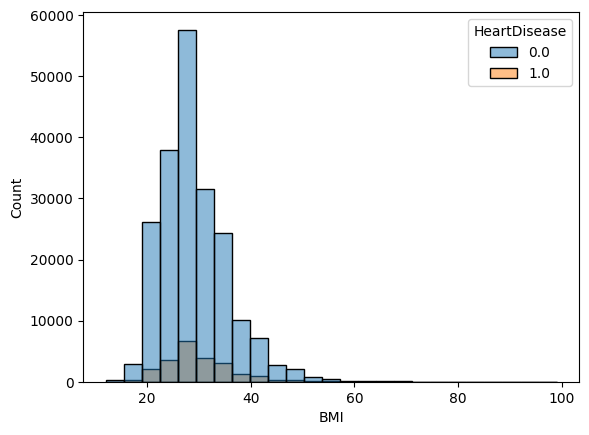

In [13]:
#how does high BMI affect risk of heart disease
sns.histplot(data=brfss, x='BMI', hue='HeartDisease', bins=25);

<Axes: xlabel='HighBP', ylabel='count'>

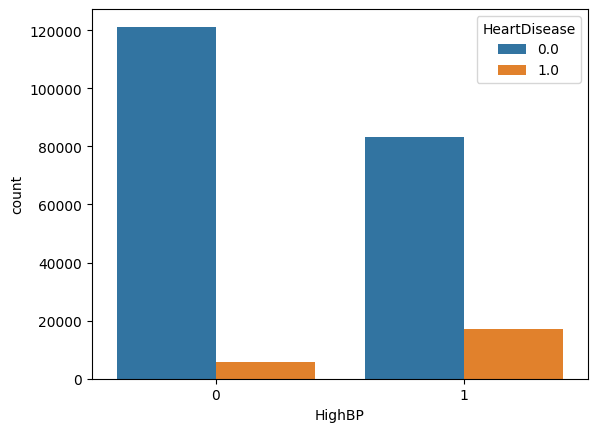

In [14]:
#how does high bp affect risk of heart disease
sns.countplot(data=brfss, x='HighBP', hue='HeartDisease');

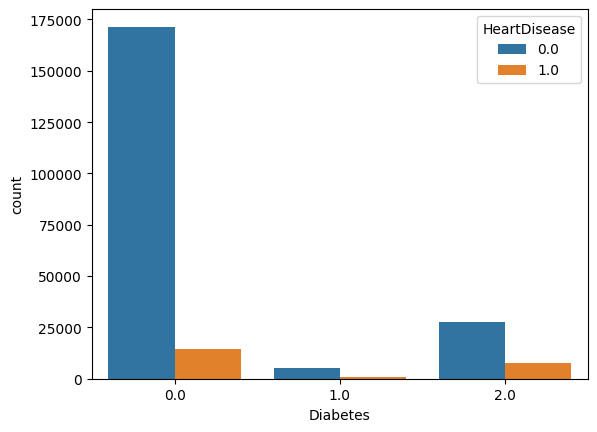

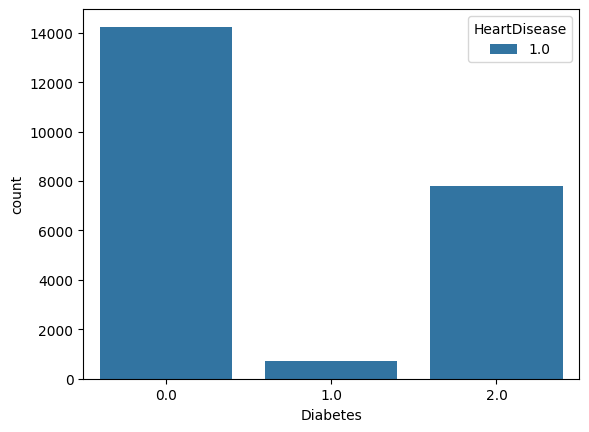

Diabetes
0.0    185717
2.0     35580
1.0      5750
Name: count, dtype: int64

In [15]:
#affect of diabetes on heart disease
sns.countplot(data=brfss, x='Diabetes', hue='HeartDisease');
plt.show()
sns.countplot(data=brfss.loc[brfss['HeartDisease'] == 1], x='Diabetes', hue='HeartDisease');
plt.show()
brfss['Diabetes'].value_counts()

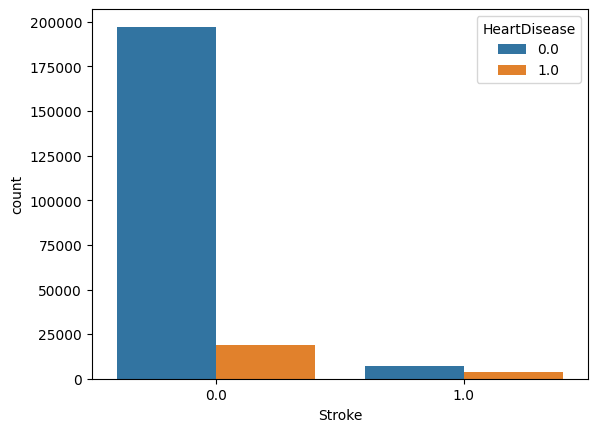

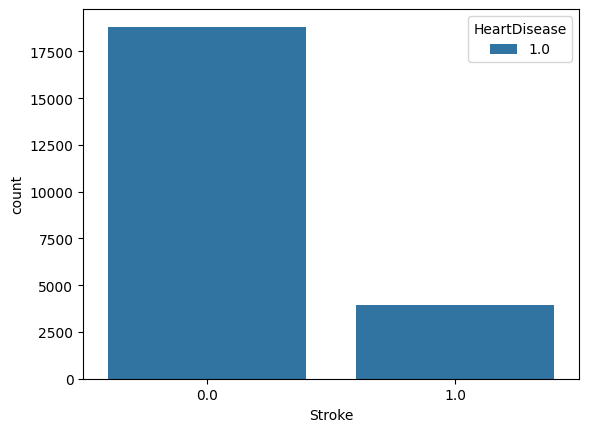

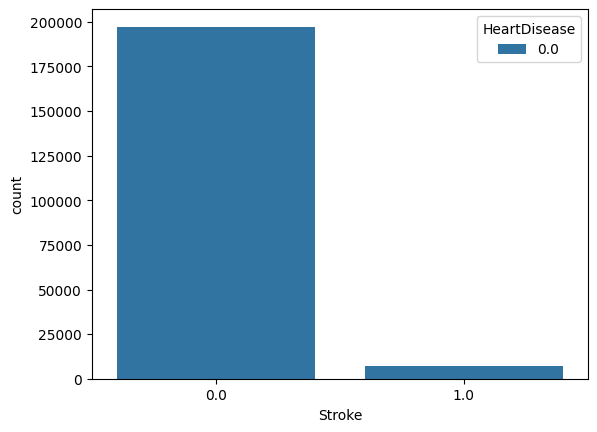

In [16]:
#how many people had a stroke AND CVD or MI 
sns.countplot(data=brfss, x='Stroke', hue='HeartDisease');
plt.show()
sns.countplot(data=brfss.loc[brfss['HeartDisease'] == 1], x='Stroke', hue='HeartDisease');
plt.show()
sns.countplot(data=brfss.loc[brfss['HeartDisease'] == 0], x='Stroke', hue='HeartDisease');
plt.show()

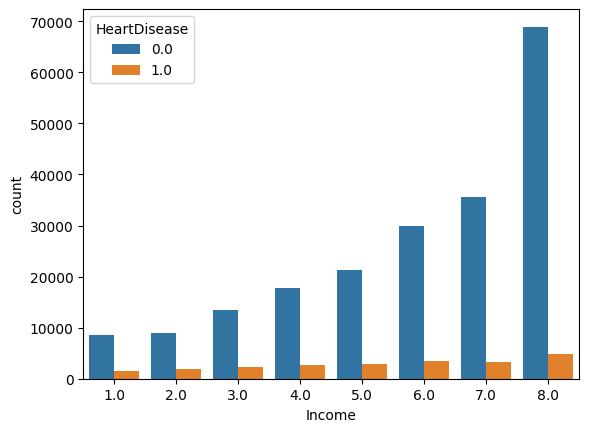

In [17]:
#does income play a factor in heart disease 
sns.countplot(data=brfss, x='Income', hue='HeartDisease');

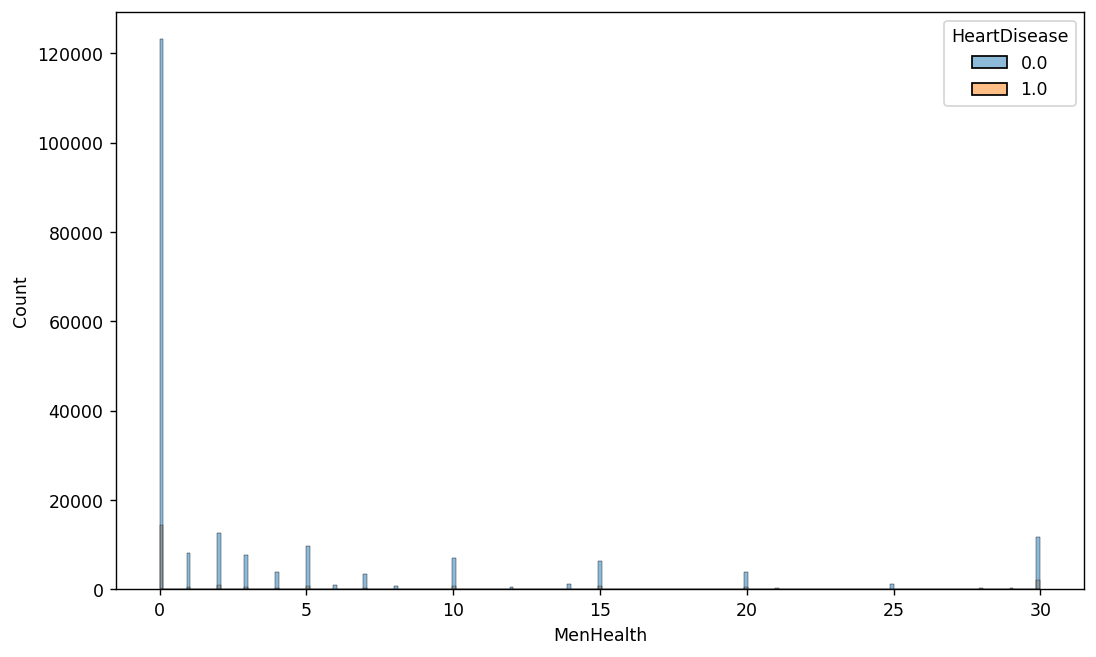

In [18]:
#what is mental health like for patients who have heart disease
plt.figure(figsize=(10,6), dpi = 125)
sns.histplot(data=brfss, x='MenHealth', hue='HeartDisease');

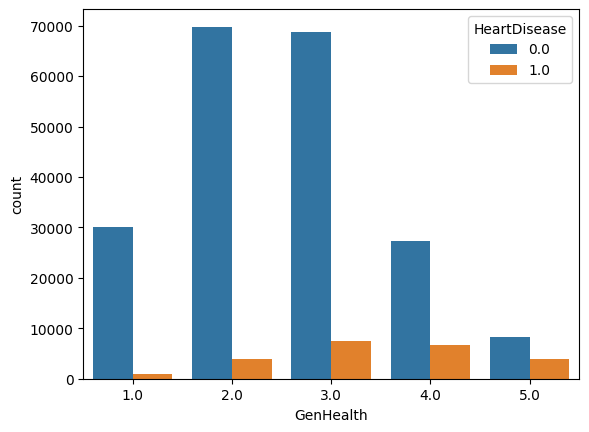

In [19]:
#what is general health like for patients who have heart disease
sns.countplot(data=brfss, x='GenHealth', hue='HeartDisease');

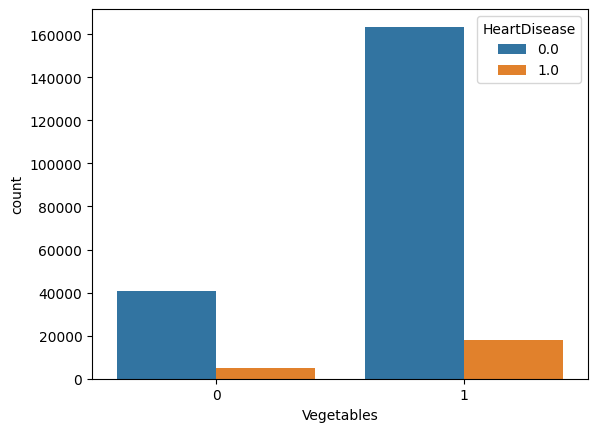

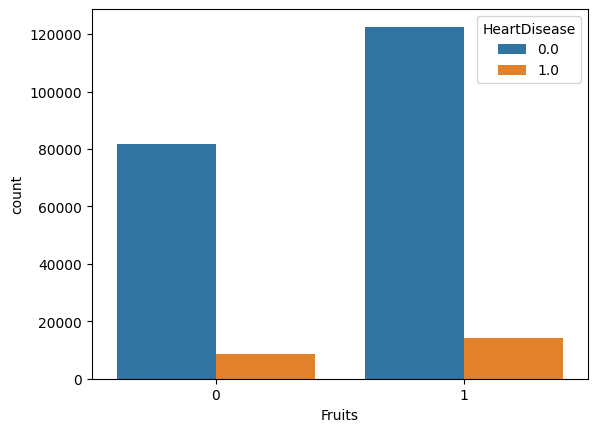

In [20]:
#how does diet affect heart disease 
sns.countplot(data=brfss, x='Vegetables', hue='HeartDisease')
plt.show()
sns.countplot(data=brfss, x='Fruits', hue='HeartDisease')
plt.show()

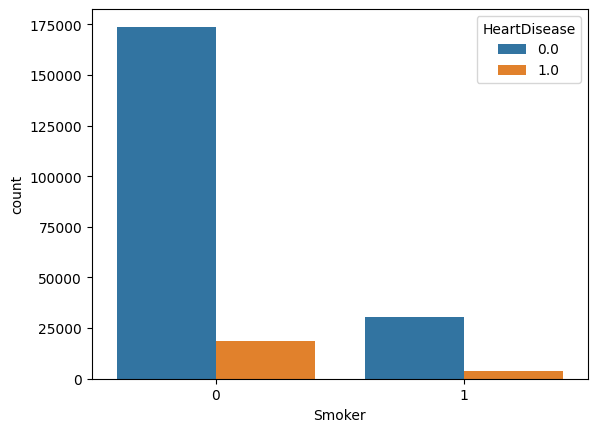

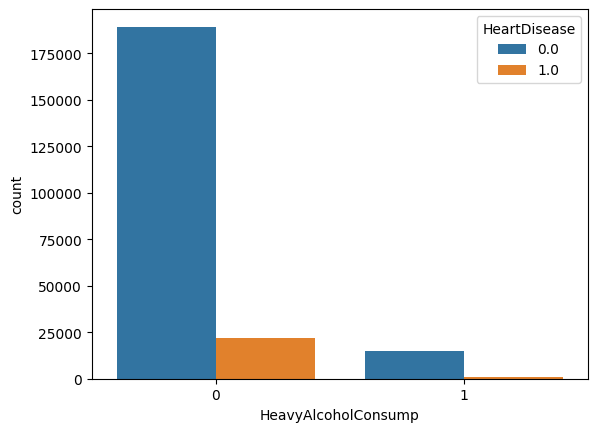

In [21]:
#how does smoking and heavy alcohol consumption affect heart disease
sns.countplot(data=brfss, x='Smoker', hue='HeartDisease')
plt.show()
sns.countplot(data=brfss, x='HeavyAlcoholConsump', hue='HeartDisease')
plt.show()

### Outliers and Correlation Between Attributes

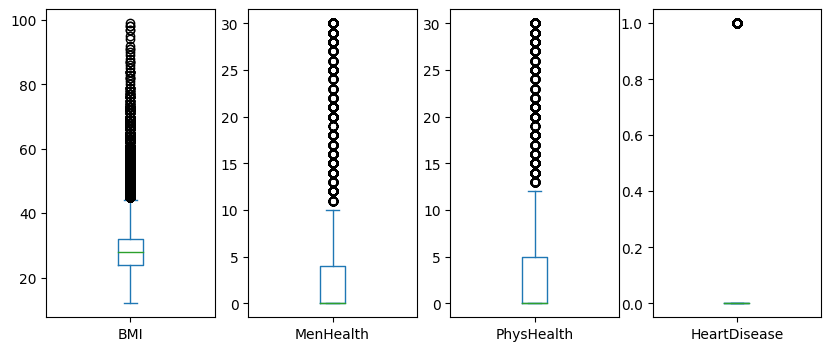

In [22]:
#outliers in the dataset
brfss_num = brfss[['BMI', 'MenHealth', 'PhysHealth', 'HeartDisease']]
brfss_num.plot(kind = "box", figsize=(10,4), subplots = True);

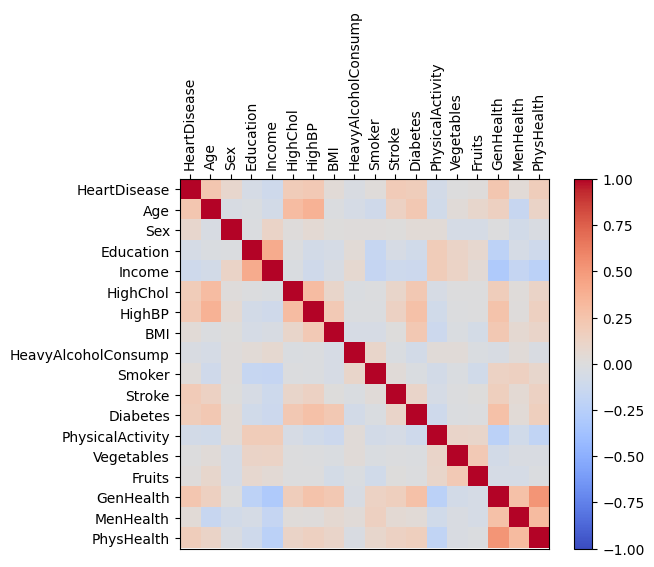

,HeartDisease,Age,Sex,Education,Income,HighChol,HighBP,BMI,HeavyAlcoholConsump,Smoker,Stroke,Diabetes,PhysicalActivity,Vegetables,Fruits,GenHealth,MenHealth,PhysHealth
HeartDisease,1.000000,0.229607,0.084947,-0.061838,-0.106060,0.186037,0.206152,0.036320,-0.038286,0.020145,0.195105,0.172058,-0.071736,-0.007086,0.009968,0.232193,0.037532,0.172922
Age,0.229607,1.000000,-0.041317,-0.030047,-0.072718,0.300146,0.360444,-0.018222,-0.059214,-0.094295,0.140383,0.217921,-0.093445,0.029683,0.089220,0.144580,-0.151428,0.111619
Sex,0.084947,-0.041317,1.000000,-0.020611,0.114492,0.012746,0.050814,0.003942,0.012306,0.010663,0.007144,0.032213,0.036975,-0.057577,-0.057681,-0.006212,-0.084218,-0.038019
Education,-0.061838,-0.030047,-0.020611,1.000000,0.400087,-0.012498,-0.075109,-0.059862,0.031366,-0.158912,-0.051083,-0.086036,0.180337,0.109507,0.070547,-0.213876,-0.060164,-0.105636
Income,-0.106060,-0.072718,0.114492,0.400087,1.000000,-0.029019,-0.101367,-0.044609,0.066779,-0.166727,-0.109869,-0.124534,0.181822,0.119903,0.039937,-0.303718,-0.168562,-0.228096
HighChol,0.186037,0.300146,0.012746,-0.012498,-0.029019,1.000000,0.300159,0.094126,-0.025008,-0.015576,0.098358,0.218521,-0.052013,-0.004058,-0.007554,0.176082,0.021639,0.114603
HighBP,0.206152,0.360444,0.050814,-0.075109,-0.101367,0.300159,1.000000,0.205674,-0.018015,-0.017352,0.134510,0.269407,-0.092789,-0.011803,-0.003887,0.254723,0.014472,0.147257
BMI,0.036320,-0.018222,0.003942,-0.059862,-0.044609,0.094126,0.205674,1.000000,-0.051091,-0.052419,0.007600,0.212403,-0.120161,-0.025162,-0.062540,0.216492,0.059940,0.102264
HeavyAlcoholConsump,-0.038286,-0.059214,0.012306,0.031366,0.066779,-0.025008,-0.018015,-0.051091,1.000000,0.093771,-0.028156,-0.074995,0.029284,0.025495,-0.030981,-0.045539,0.027654,-0.034420
Smoker,0.020145,-0.094295,0.010663,-0.158912,-0.166727,-0.015576,-0.017352,-0.052419,0.093771,1.000000,0.024099,-0.023957,-0.076531,-0.027412,-0.090881,0.129654,0.145651,0.090949


In [23]:
#correlation between the variables 
data = brfss
corr = data.corr()
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
labels = data.columns
plt.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)
plt.xticks(range(len(corr)), labels, rotation=90)
plt.yticks(range(len(corr)), labels)
plt.show()
corr

### Conclusions and Summary

1. The percentage of people suffering from heart disease is far less than those who are not
2. Despite being the minority class in the dataset, the proportion of males suffering from heart attack is higher than females. This may indicate that men are more at risk of heart disease than women.
3. As age increases, so does the risk of heart disease.
4. High cholestrol seems to play a role in higher chance of heart disease.
5. High blood pressure also seems to affect risk of heart disease. 
6. Not a very significant link with BMI and heart disease found, also further regurgitated by the correlation of BMI to heart disease
7. Despite being a small percentage of the entire dataset, people with diabetes made up a significant portion of all positive cases.
8. Stroke and heart disease seem to go hand in hand, as previous history of having a stroke does seem to increase likelihood of having CVD or MI. 
9. Income does not seem to play a huge factor in heart disease. Most of the individuals in the dataset made $75-80k/year. The increase from class to class in the income variable was mostly consistent, as was the risk of heart disease.
10. Mental health may play a small factor in heart disease (most likely due to increased stress). Individuals who described having poor mental health 30 days of the month did illicit more heart disease cases generally. However, overall it seems to have very little to do with increasing the risk of heart disease.
11. Individuals who described their general health to be poorer on average, generally had a higher proportion of positive cases of heart disease; ergo, worse general health may contribute to higher risk of heart disease.
12. There does not seem to be a big correlation between eating fruits and vegetables daily and heart disease in this dataset.
13. Neither heavy alcohol consumption or smoking seem to have a significant correlation with heart disease in the current dataset.
14. General Health and Physical Health seem to correlated, suggesting that good physical health may contribute to a good general health. Furthermore, good general health seems to decrease the risk of heart disease. It can be inferred from the data that good physical health, which subsequently leads to good general health, is also quite important in reduciing the risk CVD or MI. 